# Time normalization of data

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

Time normalization is usually employed for the temporal alignment of cyclic data obtained from different trials with different duration (number of points). The most simple and common procedure for time normalization used in Biomechanics and Motor Control is known as the normalization to percent cycle (although it might not be the most adequate procedure in certain cases ([Helwig et al., 2011](http://www.sciencedirect.com/science/article/pii/S0021929010005038)).

In the percent cycle, a fixed number (typically a temporal base from 0 to 100%) of new equally spaced data is created based on the old data with a mathematical procedure known as interpolation.   
**Interpolation** is the estimation of new data points within the range of known data points. This is different from **extrapolation**, the estimation of data points outside the range of known data points.   
Time normalization of data using interpolation is a simple procedure and it doesn't matter if the original data have more or less data points than desired.

The Python function `tnorma.py` from Python module `tnorma` implements the normalization to percent cycle procedure for time normalization. The function signature is:   
```python
yn, tn, indie = tnorma(y, axis=0, step=1, k=3, smooth=0, mask=None,
                       nan_at_ext='delete', show=False, ax=None)
```   
Let's see now how to perform interpolation and time normalization; first let's import the necessary Python libraries and configure the environment:

## Installation

```bash
pip install tnorma
```

Or

```bash
conda install -c duartexyz tnorma
```

In [1]:
# Import the necessary libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

For instance, consider the data shown next. The time normalization of these data to represent a cycle from 0 to 100%, with a step of 1% (101 data points) is:

In [2]:
y = [5,  4, 10,  8,  1, 10,  2,  7,  1,  3]
print("y data:")
y

y data:


[5, 4, 10, 8, 1, 10, 2, 7, 1, 3]

In [3]:
t  = np.linspace(0, 100, len(y))  # time vector for the original data
tn = np.linspace(0, 100, 101)     # new time vector for the new time-normalized data
yn = np.interp(tn, t, y)          # new time-normalized data
print("y data interpolated to 101 points:")
yn

y data interpolated to 101 points:


array([5.  , 4.91, 4.82, 4.73, 4.64, 4.55, 4.46, 4.37, 4.28, 4.19, 4.1 ,
       4.01, 4.48, 5.02, 5.56, 6.1 , 6.64, 7.18, 7.72, 8.26, 8.8 , 9.34,
       9.88, 9.86, 9.68, 9.5 , 9.32, 9.14, 8.96, 8.78, 8.6 , 8.42, 8.24,
       8.06, 7.58, 6.95, 6.32, 5.69, 5.06, 4.43, 3.8 , 3.17, 2.54, 1.91,
       1.28, 1.45, 2.26, 3.07, 3.88, 4.69, 5.5 , 6.31, 7.12, 7.93, 8.74,
       9.55, 9.68, 8.96, 8.24, 7.52, 6.8 , 6.08, 5.36, 4.64, 3.92, 3.2 ,
       2.48, 2.15, 2.6 , 3.05, 3.5 , 3.95, 4.4 , 4.85, 5.3 , 5.75, 6.2 ,
       6.65, 6.88, 6.34, 5.8 , 5.26, 4.72, 4.18, 3.64, 3.1 , 2.56, 2.02,
       1.48, 1.02, 1.2 , 1.38, 1.56, 1.74, 1.92, 2.1 , 2.28, 2.46, 2.64,
       2.82, 3.  ])

The key is the Numpy `interp` function, from its help:   

>interp(x, xp, fp, left=None, right=None)       
>One-dimensional linear interpolation.   
>Returns the one-dimensional piecewise linear interpolant to a function with given values at discrete data-points.

A plot of the data will show what we have done:

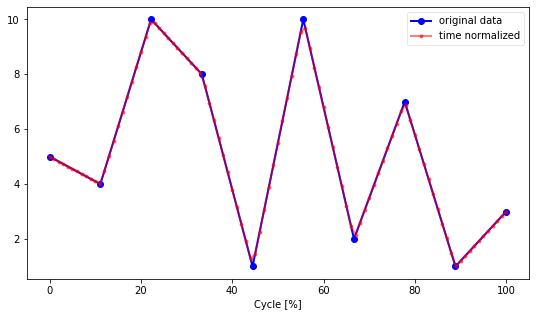

In [4]:
plt.figure(figsize=(9, 5))
plt.plot(t, y, 'bo-', lw=2, label='original data')
plt.plot(tn, yn, '.-', color=[1, 0, 0, .5], lw=2, label='time normalized')
plt.legend(loc='best', framealpha=.5)
plt.xlabel('Cycle [%]')
plt.show()

The function `tnorma.py` implements this kind of normalization with option for a different interpolation than the linear one used, deal with missing points in the data (if these missing points are not at the extremities of the data because the interpolation function can not extrapolate data), other things.   
Let's see the `tnorma.py` examples:

In [6]:
from tnorma import tnorma

In [7]:
    >>> # Default options: cubic spline interpolation passing through
    >>> # each datum, 101 points, and no plot
    >>> y = [5,  4, 10,  8,  1, 10,  2,  7,  1,  3]
    >>> tnorma(y)

(array([ 5.        ,  4.17809249,  3.5387693 ,  3.06958033,  2.75807549,
         2.59180468,  2.55831781,  2.64516477,  2.83989546,  3.13005979,
         3.50320766,  3.94688897,  4.44865363,  4.99605153,  5.57663259,
         6.17794669,  6.78754374,  7.39297365,  7.98178632,  8.54153165,
         9.05975953,  9.52401988,  9.9218626 , 10.24155044, 10.47700754,
        10.62485776, 10.68174158, 10.6442995 , 10.509172  , 10.27299957,
         9.93242271,  9.4840819 ,  8.92461763,  8.25067039,  7.46097301,
         6.57858161,  5.64224479,  4.6909727 ,  3.76377547,  2.89966325,
         2.13764617,  1.51673437,  1.075938  ,  0.85426719,  0.89073208,
         1.22148967,  1.83147733,  2.66132882,  3.65021709,  4.73731509,
         5.86179577,  6.96283209,  7.97959699,  8.85126343,  9.51700436,
         9.91599272,  9.98916876,  9.73107126,  9.19820454,  8.45052464,
         7.54798763,  6.55054957,  5.5181665 ,  4.51079448,  3.58838957,
         2.81090783,  2.2383053 ,  1.92987303,  1.9

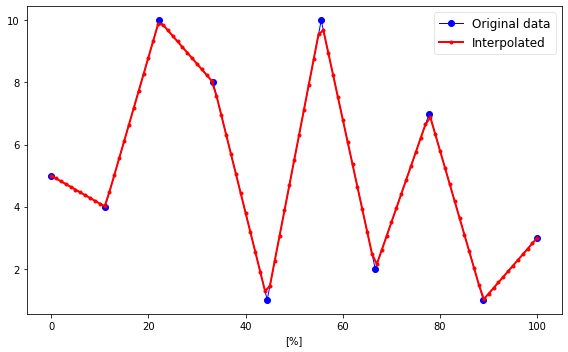

In [8]:
    >>> # Linear interpolation passing through each datum
    >>> yn, tn, indie = tnorma(y, k=1, smooth=0, mask=None, show=True)

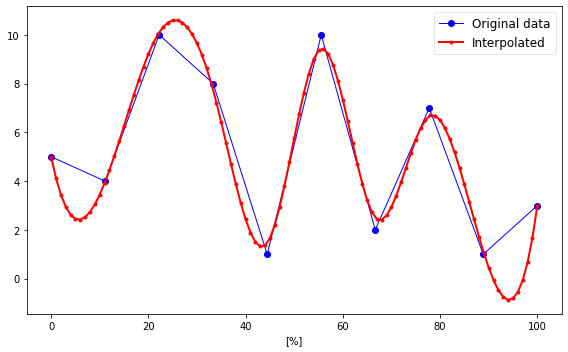

In [9]:
    >>> # Cubic spline interpolation with smoothing
    >>> yn, tn, indie = tnorma(y, k=3, smooth=1, mask=None, show=True)

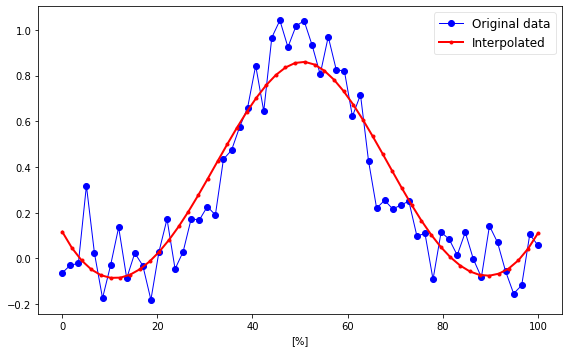

In [10]:
    >>> # Cubic spline interpolation with smoothing and 50 points
    >>> x = np.linspace(-3, 3, 60)
    >>> y = np.exp(-x**2) + np.random.randn(60)/10
    >>> yn, tn, indie = tnorma(y, step=-50, k=3, smooth=1, show=True)

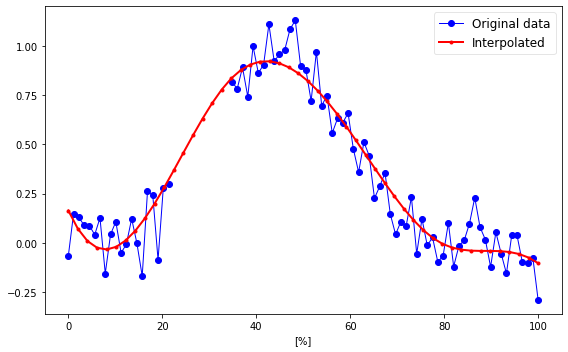

In [11]:
    >>> # Deal with missing data (use NaN as mask)
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> y[:10] = np.NaN # first ten points are missing
    >>> y[30: 41] = np.NaN # make other 10 missing points
    >>> yn, tn, indie = tnorma(y, step=-50, k=3, smooth=1, show=True)

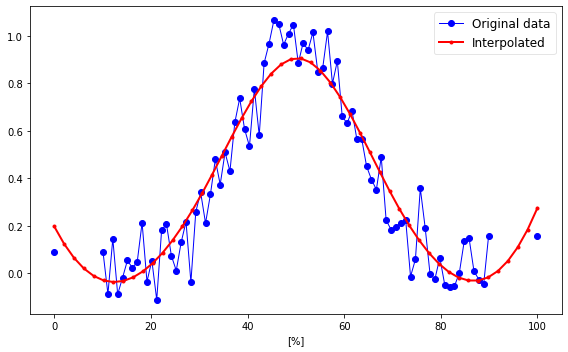

In [12]:
    >>> # Deal with missing data at the extremities replacing by first/last not-NaN
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> y[0:10] = np.NaN # first ten points are missing
    >>> y[-10:] = np.NaN # last ten points are missing
    >>> yn, tn, indie = tnorma(y, step=-50, k=3, smooth=1, nan_at_ext='replace', show=True)

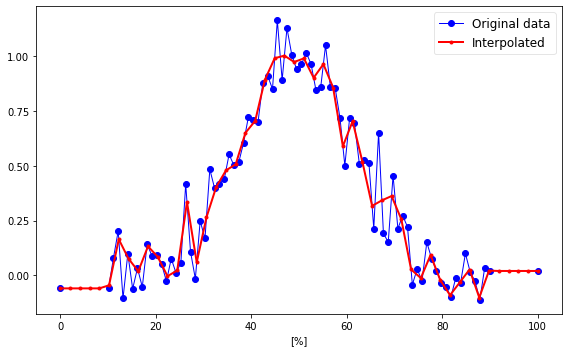

In [13]:
    >>> # Deal with missing data at the extremities replacing by first/last not-NaN
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> y[0:10] = np.NaN # first ten points are missing
    >>> y[-10:] = np.NaN # last ten points are missing
    >>> yn, tn, indie = tnorma(y, step=-50, k=1, smooth=0, nan_at_ext='replace', show=True)

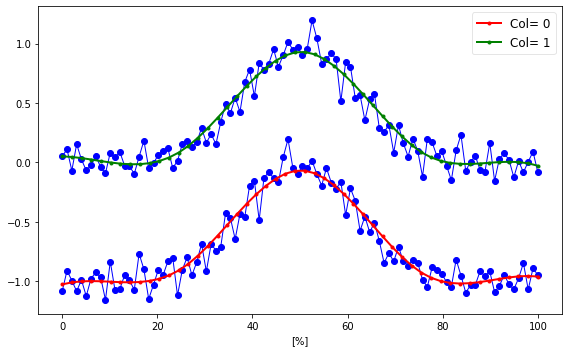

In [14]:
    >>> # Deal with 2-D array
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> y = np.vstack((y-1, y[::-1])).T
    >>> yn, tn, indie = tnorma(y, step=-50, k=3, smooth=1, show=True)